# OUTLIERS FDA-CHILLER LEAKING 40

In [1]:
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_to_xls = "F:/Talles/Doutorado/database/1043-RP/FDD Data/Refrigerant leak/rl40.xls"
sheet = "Complete Data Set"
leaking_40 = pd.read_excel(path_to_xls,sheet)

In [3]:
leaking_40.shape

(5191, 66)

c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


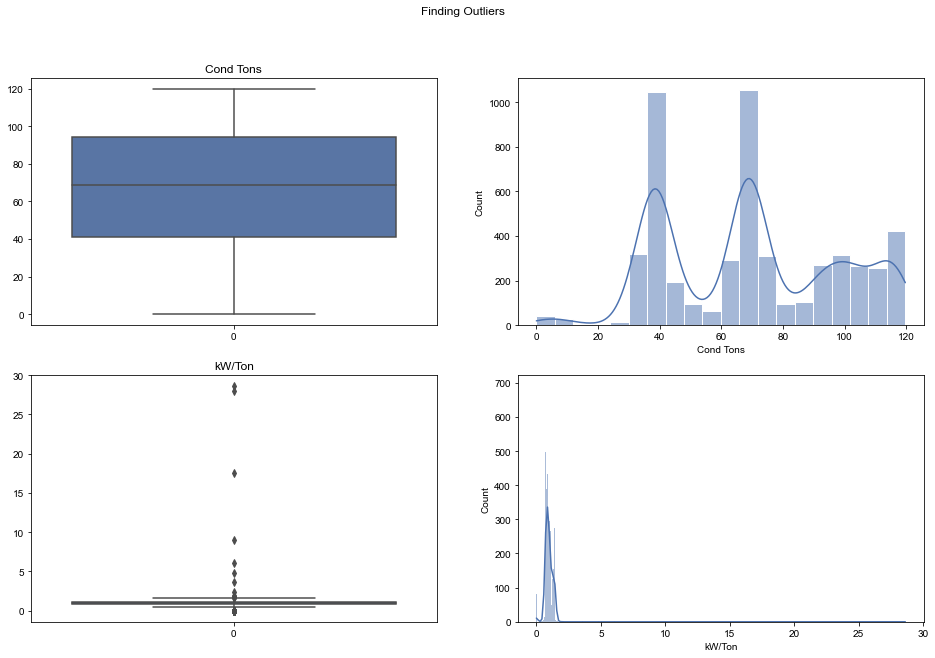

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Finding Outliers')
sns.set_theme(style="whitegrid")
sns.boxplot(ax=axes[0,0], data=leaking_40["Cond Tons"])
axes[0,0].set_title('Cond Tons')
sns.histplot(leaking_40["Cond Tons"], kde=True, ax=axes[0,1])
sns.boxplot(ax=axes[1,0], data=leaking_40["kW/Ton"])
axes[1,0].set_title('kW/Ton')
sns.histplot(leaking_40["kW/Ton"], kde=True, ax=axes[1,1])
fig.show()

![Outlier](./figuras/outlier_normal.JPG)

## Test outliers

In [5]:
print(leaking_40['Cond Tons'].mean())
print(leaking_40['Cond Tons'].std())

69.46220400693508
27.998746517892712


In [6]:
print("Highest allowed",leaking_40['kW/Ton'].mean() + 3*leaking_40['kW/Ton'].std())
print("Minimal allowed",leaking_40['kW/Ton'].mean() - 3*leaking_40['kW/Ton'].std())

Highest allowed 2.9495807568644516
Minimal allowed -0.9801327121717143


In [7]:
leaking_40[(leaking_40['kW/Ton'] > 2.95) | (leaking_40['kW/Ton'] < -0.98)]

,Time,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,...,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB
37,373.6,50,62.03,62.2,62.06,62.0,61.66,61.4,61.95,61.9,...,57.0,56,30.0,55.93,59.14,62.34,62.28,29.93,32.99,259.60
38,383.6,50,62.03,62.2,61.98,61.7,61.66,61.6,62.03,62.6,...,57.0,56,30.0,55.93,59.14,62.34,62.28,40.31,33.30,263.70
39,393.6,50,62.03,62.2,61.85,61.4,61.62,61.4,62.23,63.1,...,57.0,56,30.0,55.93,59.14,62.34,62.32,57.64,33.12,237.60
40,403.6,50,61.99,62.0,61.65,60.9,61.66,61.9,62.48,63.6,...,57.0,56,30.0,55.89,59.18,62.34,62.28,66.16,24.35,201.50
41,413.6,50,61.99,61.9,61.40,60.6,61.74,62.2,62.77,64.0,...,57.0,56,30.0,55.89,59.30,62.26,62.20,70.58,24.40,158.40
42,423.6,50,61.91,61.7,61.16,60.0,61.87,62.2,63.13,65.0,...,57.0,56,30.0,55.89,59.43,62.18,62.12,74.10,15.48,122.20
43,433.6,50,61.83,61.6,60.79,59.4,61.99,62.6,63.63,66.2,...,57.0,56,30.0,55.89,59.59,62.05,62.04,85.89,24.47,68.43


In [8]:
#return outliers > mean+3sigma or < mean-3sigma
def outlier_3sigma(pd_column):
    mean_vals = pd_column.mean()
    std_vals = pd_column.std()
    min_value = mean_vals-3*std_vals
    max_value = mean_vals+3*std_vals
    outliers = np.nonzero((pd_column.values>max_value)|(pd_column.values<min_value))
    return outliers

In [9]:
outlier_3sigma(leaking_40['kW/Ton'])

(array([37, 38, 39, 40, 41, 42, 43], dtype=int64),)

In [10]:
idx2 = np.array([])
for col_header in leaking_40.columns:
    idx1 = outlier_3sigma(leaking_40[col_header])
    idx2 = np.union1d(idx1,idx2)
    idx2 = np.unique(idx2)
print(len(idx2))

536


In [11]:
df_without_outlier= leaking_40.drop(idx2)
print(np.shape(df_without_outlier))

(4655, 66)


c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


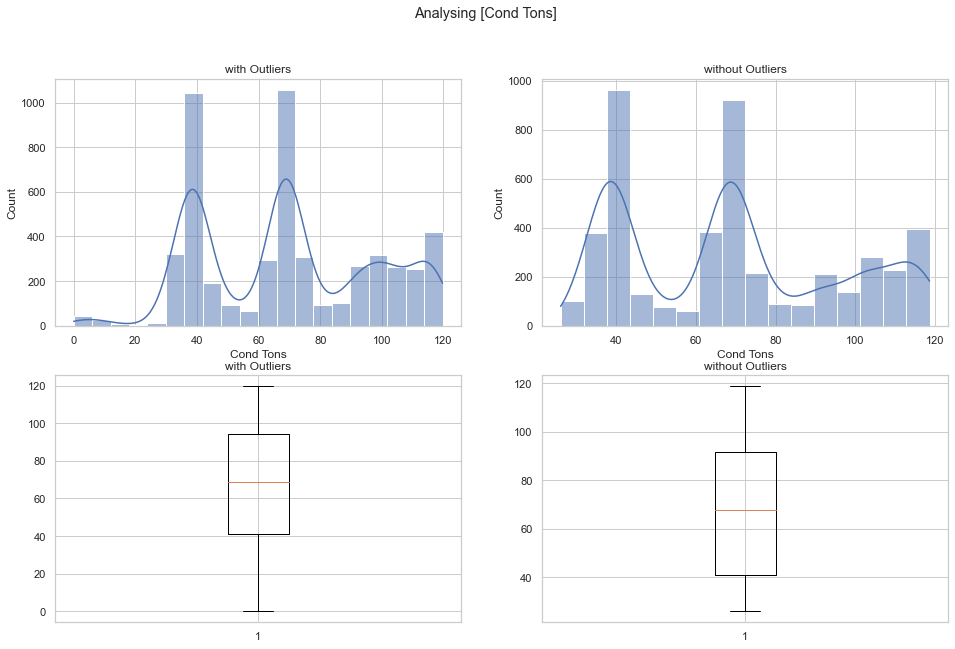

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Analysing [Cond Tons] ')
sns.set_theme(style="whitegrid")
sns.histplot(leaking_40["Cond Tons"], kde=True, ax=axes[0,0])
axes[0,0].set_title('with Outliers')
sns.histplot(df_without_outlier["Cond Tons"], kde=True, ax=axes[0,1])
axes[0,1].set_title('without Outliers')
axes[1,0].boxplot(leaking_40["Cond Tons"])
axes[1,0].set_title('with Outliers')
axes[1,1].boxplot(df_without_outlier["Cond Tons"])
axes[1,1].set_title('without Outliers')
fig.show()

## Interquartile

The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

![InterQuartile](./figuras/IQR.JPG)

In [13]:
percentile25 = leaking_40['kW/Ton'].quantile(0.25)
percentile75 = leaking_40['kW/Ton'].quantile(0.75)
iqr = percentile75 - percentile25

In [14]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1.6225500000000004
0.2717499999999998


In [15]:
leaking_40[(leaking_40['kW/Ton'] > upper_limit) | (leaking_40['kW/Ton'] < lower_limit)]

,Time,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,...,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB
0,3.647,50,57.12,57.2,57.10,57.4,67.64,67.6,69.36,69.7,...,57.0,56,0.0,56.96,68.23,57.80,58.72,3.325000e-46,3.495000e-46,1.361000e-45
1,13.590,50,57.08,57.2,57.10,57.5,67.64,67.5,69.32,69.7,...,57.0,56,30.0,56.96,68.23,57.84,58.72,3.185000e-46,3.495000e-46,1.361000e-45
2,23.580,50,57.12,57.5,57.19,58.0,67.68,66.8,69.36,67.8,...,57.0,56,30.0,56.96,68.23,58.12,58.64,1.399000e+01,9.592000e+00,6.750000e+01
3,33.580,50,57.20,59.6,57.47,58.0,67.44,66.1,68.99,66.1,...,57.0,56,30.0,57.00,68.23,58.25,58.39,1.283000e+01,4.797000e+01,1.230000e+02
4,43.580,50,57.65,60.2,57.76,58.8,67.15,65.6,68.42,66.1,...,57.0,56,30.0,56.92,68.07,58.74,58.80,6.578000e-01,5.917000e+01,1.410000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,51870.000,40,56.83,57.1,56.82,56.9,57.08,57.1,57.40,56.9,...,56.0,56,0.0,55.98,56.60,57.18,57.20,5.806000e-46,4.762000e-46,3.771000e-45
5187,51880.000,40,56.83,56.9,56.82,56.8,57.08,57.1,57.36,57.1,...,56.0,56,0.0,55.98,56.60,57.18,57.25,2.641000e-46,2.225000e-46,3.644000e-45
5188,51890.000,40,56.83,57.1,56.82,56.9,57.08,57.2,57.40,57.1,...,56.0,56,0.0,55.98,56.64,57.18,57.29,5.806000e-46,3.494000e-46,3.644000e-45
5189,51900.000,40,56.83,57.1,56.82,56.9,57.04,57.1,57.40,57.1,...,56.0,56,0.0,55.98,56.60,57.14,57.29,5.806000e-46,3.494000e-46,3.644000e-45


In [16]:
#return outliers > mean+3sigma or < mean-3sigma
def outlier_iqr(pd_column):
    percentile_25 = pd_column.quantile(0.25)
    percentile_75 = pd_column.quantile(0.75)
    iqr = percentile_75-percentile_25
    upper_limit = percentile_75 + 1.5 * iqr
    lower_limit = percentile_25 - 1.5 * iqr
    outliers = np.nonzero((pd_column.values>upper_limit)|(pd_column.values<lower_limit))
    return outliers

In [17]:
x = outlier_iqr(leaking_40['kW/Ton'])
print(x)
print(np.shape(x))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45, 1073, 1074, 1075, 1076, 1077, 3182, 4763, 5148, 5149,
       5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160,
       5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5171,
       5172, 5173, 5174, 5175, 5176, 5177, 5178, 5179, 5180, 5181, 5182,
       5183, 5184, 5185, 5186, 5187, 5188, 5189, 5190], dtype=int64),)
(1, 96)


In [18]:
idx2 = np.array([])
for col_header in leaking_40.columns:
    idx1 = outlier_iqr(leaking_40[col_header])
    idx2 = np.union1d(idx1,idx2)
    idx2 = np.unique(idx2)
print(len(idx2))

2325


In [19]:
df_without_outlier_iqr = leaking_40.drop(idx2)
print(np.shape(df_without_outlier_iqr))
print("expected number of rows : = {} ".format(5191-2325))

(2866, 66)
expected number of rows : = 2866 


###  Percentile :

– This technique works by setting a particular threshold value, which decides based on our problem statement.

– While we remove the outliers using capping, then that particular method is known as Winsorization.

– Here we always maintain symmetry on both sides means if remove 1% from the right then in the left we also drop by 1%.

## Normal Refrigerant

Normal R - Refrigerant charge at nominal (300lbs)

Normal R1 - Refrigerant charge at nominal (300lbs)

In [20]:
path_to_xls = "F:/Talles/Doutorado/database/1043-RP/FDD Data/Benchmark Tests/normal r.xls"
sheet = "Complete Data Set"
Normal_R = pd.read_excel(path_to_xls,sheet)
print (np.shape(Normal_R))

(5191, 66)


c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


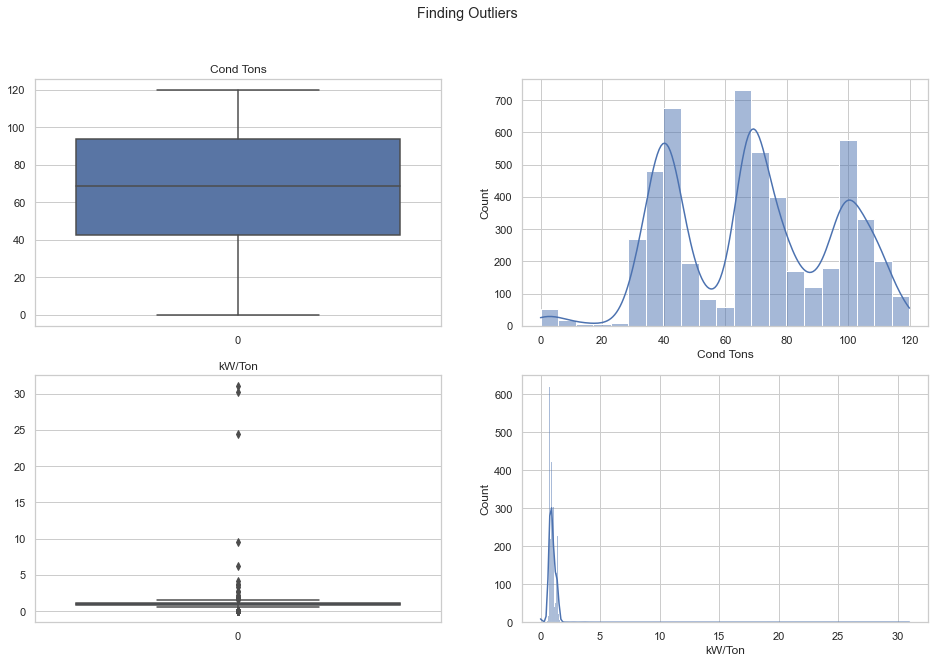

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Finding Outliers')
sns.set_theme(style="whitegrid")
sns.boxplot(ax=axes[0,0], data=Normal_R["Cond Tons"])
axes[0,0].set_title('Cond Tons')
sns.histplot(Normal_R["Cond Tons"], kde=True, ax=axes[0,1])
sns.boxplot(ax=axes[1,0], data=Normal_R["kW/Ton"])
axes[1,0].set_title('kW/Ton')
sns.histplot(Normal_R["kW/Ton"], kde=True, ax=axes[1,1])
fig.show()

In [22]:
idx2 = np.array([])
for col_header in Normal_R.columns:
    idx1 = outlier_3sigma(Normal_R[col_header])
    idx2 = np.union1d(idx1,idx2)
    idx2 = np.unique(idx2)
print(len(idx2))

528


In [23]:
dfNormal_without_outlier = Normal_R.drop(idx2)
print(np.shape(dfNormal_without_outlier))
print("expected number of rows : = {} ".format(5191-528))

(4663, 66)
expected number of rows : = 4663 
